In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data=2000
num_epoch=10000

noise=init.normal_(torch.FloatTensor(num_data,1),std=1)
x=init.uniform_(torch.Tensor(num_data,1),-20,20)
y=x**3 +3
y_noise=y+noise


In [3]:
model=nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,1)
    )

loss_func=nn.L1Loss()
optimizer=optim.SGD(model.parameters(),lr=0.001)



In [4]:
loss_array=[]

for i in range(num_epoch):
  optimizer.zero_grad()
  output=model(x)

  loss=loss_func(output,y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy())

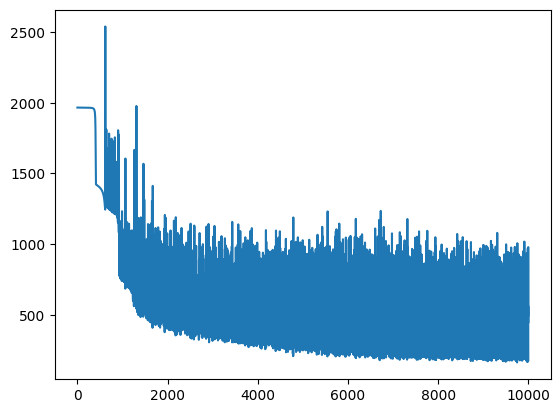

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

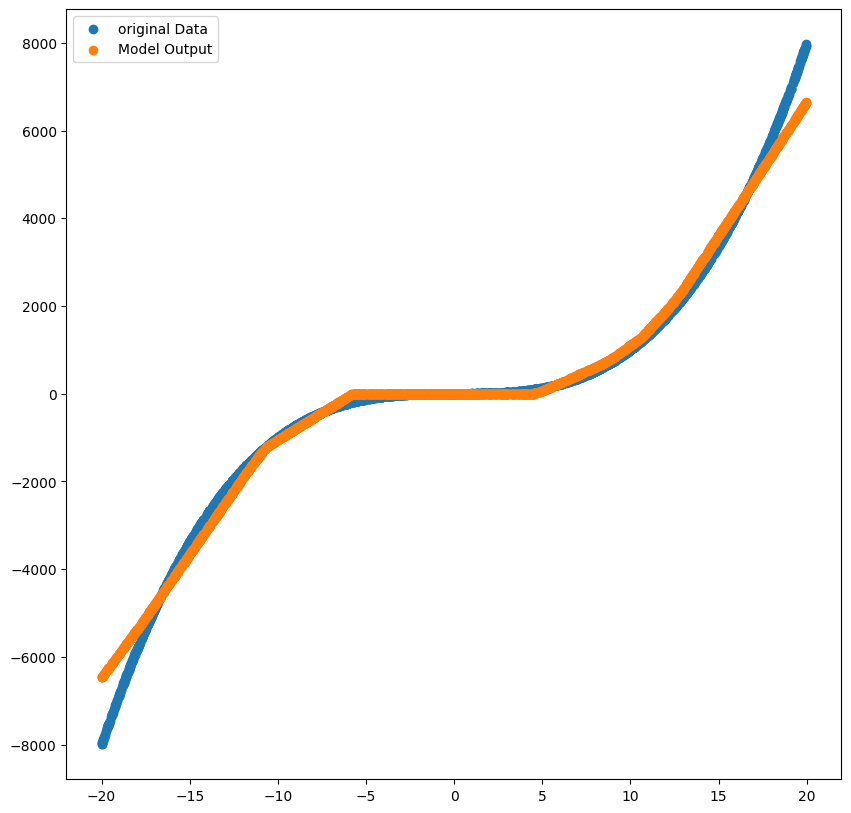

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()